In [115]:
import numpy as np
import pandas as pd
import seaborn as sns

In [116]:
data = pd.read_csv("train_LZdllcl.csv")

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


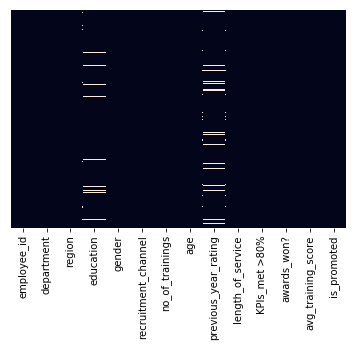

In [118]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [119]:
data.loc[(data.is_promoted == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4
data.loc[(data['KPIs_met >80%'] == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4
data.loc[(data['awards_won?'] == 1) & (pd.isnull(data.previous_year_rating)),'previous_year_rating'] = 4

In [120]:
data['previous_year_rating'].fillna(3, inplace=True)

In [121]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [122]:
data = data.dropna()

In [123]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


data.loc[(data['is_promoted'] == 1),'previous_year_rating'].fillna(4, inplace=True)
data.loc[(data['KPIs_met >80%'] == 1),'previous_year_rating'].fillna(4, inplace=True)
data.loc[(data['awards_won?'] == 1),'previous_year_rating'].fillna(4, inplace=True)
data['previous_year_rating'].fillna(3, inplace=True)

if data['is_promoted'] == 1:
    data['previous_year_rating'].fillna(4, inplace=True)
elif data['KPIs_met >80%'] == 1:
    data['previous_year_rating'].fillna(4, inplace=True)
elif data['awards_won?'] == 1:
    data['previous_year_rating'].fillna(4, inplace=True)
else:
    data['previous_year_rating'].fillna(3, inplace=True)

In [124]:
region = pd.get_dummies(data.region,drop_first=True)

In [125]:
region.head()

,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,region_19,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
education = pd.get_dummies(data.education, drop_first=True)
trainings = pd.get_dummies(data.no_of_trainings,drop_first=True)
rating = pd.get_dummies(data.previous_year_rating,drop_first=True)
department = pd.get_dummies(data.department,drop_first=True)
gender = pd.get_dummies(data.gender,drop_first=True)
recruitment_channel = pd.get_dummies(data.recruitment_channel,drop_first=True)

In [127]:
totaldata = pd.concat([data,region,education,department,trainings, gender,rating,recruitment_channel], axis=1)

In [128]:
totaldata.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,8,9,10,m,2.0,3.0,4.0,5.0,referred,sourcing
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,0,0,0,0,0,0,0,1,0,1
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,0,0,0,1,0,0,0,1,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,0,0,0,1,0,1,0,0,0,1
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,0,0,0,1,0,0,0,0,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,0,0,0,1,0,1,0,0,0,0


In [129]:
totaldata = totaldata.drop(columns=['department','region','education','gender','recruitment_channel','no_of_trainings','previous_year_rating'])

totaldata.to_csv('hr-total-cat.csv',index=False)